# Linear Regression

## Intro

In this notebook we will explore the numeric solution for the Linear Regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
%matplotlib inline

We'll define our own class for the linear regression model. To make it more flexible, we'll make the code independent of whatever loss function we'll decide to optimize using gradient descent. So let's start by defining the loss functions, together with their gradients.

## Loss functions

If we denote the true outcomes $y=\left\{y_1, \ldots, y_N\right\}$ and the predictions $\hat{y}=\left\{\hat{y}_1, \ldots, \hat{y}_N\right\}$, then MSE loss may be defined as:
$$\text{MSE}(y, \hat{y})=\frac{1}{N}\sum_{i=1}^N(y_i-\hat{y}_i)^2$$
and its gradient written in vector notation:
$$\frac{\partial\text{MSE}(y, \hat{y})}{\partial\hat{y}}=\frac{2}{N}(\hat{y}-y)$$
(you can check that it holds componentwise).

So we'll have a class for the MSE loss:

In [ ]:
class MSELoss:
    def evaluate(self, y, yhat):
        # SOLUTION
        return np.mean((yhat - y)**2)

    def grad(self, y, yhat):
        # SOLUTION
         return 2 * (yhat - y) / y.shape[0]

Let's also code the MAE loss in a similar manner. MAE loss is defined as:
$$\text{MAE}(y, \hat{y})=\frac{1}{N}\sum_{i=1}^N|y_i-\hat{y}_i|$$
and its gradient is
$$\frac{\partial\text{MAE}(y, \hat{y})}{\partial\hat{y}}=~?$$

...haha, no answer this time. I'm sure you can do it yourself. Think what it is and try to code it below.

*Hint: you may find some of these numpy functions useful: `np.sign` or `np.where`*

In [ ]:
class MAELoss:
    def evaluate(self, y, yhat):
        # SOLUTION
        return np.mean(np.abs(y - yhat))
        # raise NotImplementedError()

    def grad(self, y, yhat):
        # SOLUTION
        return -np.sign(y - yhat) / y.shape[0]
       # raise NotImplementedError()

When ready, check your solution with the assertions below:

In [ ]:
mae_loss = MAELoss()

dummy_y = np.array([[ 2.96568876, -0.44775447, -2.08341949],
                    [-0.19653415, -1.35417292,  2.38227265],
                    [-0.3718978 ,  0.94750511, -0.34423604],
                    [-0.5259521 , -0.61043298,  0.08949304],
                    [-0.1841808 , -0.86844919,  0.05762396]])
dummy_yhat = np.array([[ 1.97139419,  0.64517944,  0.42927158],
                       [-0.13414484,  0.51593211, -1.12827816],
                       [ 1.2921285 , -0.46942819, -0.32441611],
                       [-0.66332328,  1.66408605, -0.63113832],
                       [ 1.04913489, -2.4929845 ,  0.37787085]])

np.testing.assert_equal(
    mae_loss.evaluate(dummy_y, dummy_yhat).shape,
    ()
)
np.testing.assert_almost_equal(
    mae_loss.evaluate(dummy_y, dummy_yhat),
    1.2969575793333334
)

np.testing.assert_equal(
    mae_loss.grad(dummy_y, dummy_yhat).shape,
    (5, 3)
)
np.testing.assert_almost_equal(
    mae_loss.grad(dummy_y, dummy_yhat),
    np.array([[-0.2,  0.2,  0.2],
              [ 0.2,  0.2, -0.2],
              [ 0.2, -0.2,  0.2],
              [-0.2,  0.2, -0.2],
              [ 0.2, -0.2,  0.2]])
)

dummy_y = np.array([-0.5259521 , -0.61043298,  0.08949304, -0.1841808 , -0.86844919,  0.05762396])
dummy_yhat = np.array([1.97139419,  0.64517944,  0.42927158, -0.13414484,  0.51593211, -1.12827816])
np.testing.assert_equal(
    mae_loss.grad(dummy_y, dummy_yhat).shape,
    (6,)
)

## Linear model

Now we need to define a function for calculating linear model prediction. `features` is the design matrix of shape `(N, d)`, where `d` is the number of features and `N` – the number of objects in the dataset. `parameters` is the vector or matrix of parameters either of shape `(d,)` (in case the targets are 1-dimensional), or of shape `(d, m)` (in case the targets are `m`-dimensional).

*Hint: use `np.matmul` or `@` for matrix multiplication.*

In [ ]:
def linear_model_prediction(features, parameters):
    # SOLUTION
    return features @ parameters
    #raise NotImplementedError()

Check that your solution passes the assertions below:

In [ ]:
dummy_features = np.array([[0.96276835, 0.07560504, 0.36568075],
                           [0.22538127, 0.19583308, 0.14080295],
                           [0.62241364, 0.78132186, 0.5782984 ],
                           [0.14696271, 0.81112377, 0.63595471],
                           [0.38816571, 0.6741303 , 0.25990498],
                           [0.95793412, 0.52965972, 0.24189329]])
dummy_parameters = np.array([[0.50060357, 0.67962033],
                             [0.07623922, 0.27470382],
                             [0.80696549, 0.45966487]])
np.testing.assert_almost_equal(
    linear_model_prediction(dummy_features, dummy_parameters),
    np.array([[0.78282109, 0.84317653],
              [0.24137995, 0.27169196],
              [0.83781671, 0.90346052],
              [0.64860301, 0.61502368],
              [0.45544666, 0.56846067],
              [0.71512562, 0.9077209 ]])
)
np.testing.assert_equal(
    linear_model_prediction(dummy_features, dummy_parameters).shape,
    (6, 2)
)
dummy_features = np.array([[0.96276835, 0.07560504, 0.36568075],
                           [0.22538127, 0.19583308, 0.14080295],
                           [0.62241364, 0.78132186, 0.5782984 ],
                           [0.14696271, 0.81112377, 0.63595471],
                           [0.38816571, 0.6741303 , 0.25990498],
                           [0.95793412, 0.52965972, 0.24189329]])
dummy_parameters = np.array([0.50060357, 0.07623922, 0.80696549])
np.testing.assert_almost_equal(
    linear_model_prediction(dummy_features, dummy_parameters),
    np.array([0.78282109, 0.24137995, 0.83781671, 0.64860301, 0.45544666,
       0.71512562])
)
np.testing.assert_equal(
    linear_model_prediction(dummy_features, dummy_parameters).shape,
    (6,)
)

We'll optimize our model with gradient descent optimization. We already defined the gradients of the losses wrt the model outputs (`loss_gradients` in the cell below):
$$\frac{\partial\text{Loss}(y, \hat{y})}{\partial\hat{y}}$$
Now we need to calculate the gradient of the loss wrt the model parameters:
$$\hat{y} = XW$$
$$\frac{\partial\text{Loss}(y, \hat{y})}{\partial W}=~?$$

*Hint: try to analyze the shapes of all the variables and the shape of the result you want to get.*

In [ ]:
def linear_model_gradients(features, loss_gradients):
    # YOUR CODE HERE
    return features.T @ loss_gradients
    # raise NotImplementedError()

Check the assertions below:

In [ ]:
dummy_features = np.array([[0.96276835, 0.07560504, 0.36568075],
                           [0.22538127, 0.19583308, 0.14080295],
                           [0.62241364, 0.78132186, 0.5782984 ],
                           [0.14696271, 0.81112377, 0.63595471],
                           [0.38816571, 0.6741303 , 0.25990498]])

dummy_gradients = np.array([[ 2.96568876, -2.08341949],
                            [-0.19653415,  2.38227265],
                            [-0.3718978 , -0.34423604],
                            [-0.5259521 ,  0.08949304],
                            [-0.1841808 ,  0.05762396]])

np.testing.assert_equal(
    linear_model_gradients(dummy_features, dummy_gradients).shape,
    (3, 2)
)
np.testing.assert_almost_equal(
    linear_model_gradients(dummy_features, dummy_gradients),
    np.array([[ 2.43071388, -1.64766813],
              [-0.65561286,  0.15148762],
              [ 0.45940358, -0.55361626]])
)

dummy_gradients = np.array([-2.08341949, 2.38227265, -0.34423604, 0.08949304, 0.05762396])
np.testing.assert_equal(
    linear_model_gradients(dummy_features, dummy_gradients).shape,
    (3,)
)
np.testing.assert_almost_equal(
    linear_model_gradients(dummy_features, dummy_gradients),
    np.array([-1.64766813,  0.15148762, -0.55361626])
)


## Polynomial features

Within this tutorial, this function will only be used for 1-dimensional problems. Having a single feature – design matrix `X` of shape `(N, 1)` – you want to raise it to all different powers up to `power` (inclusive), starting from power 0 (to account for the bias term).

In [ ]:
def polynomial_expand(X, power, limits=None):

    # You don't want to raise large numbers to large powers,
    # so we might need to normalize the feature
    if limits is not None:
        X = (X - limits[0]) / (limits[1] - limits[0])
    # YOUR CODE HERE
    # return X ** np.arange(power + 1).reshape(1, -1)

Again, automatic checks:

In [ ]:
dummy_features = np.array([-0.29242939, -1.51807567, -1.42512742, -2.39793806,  0.69249136]).reshape(-1, 1)
np.testing.assert_almost_equal(
    polynomial_expand(dummy_features, 5, (-2, 2)),
    np.array([[ 1.00000000e+00,  4.26892652e-01,  1.82237337e-01,
                7.77957801e-02,  3.32104469e-02,  1.41772958e-02],
              [ 1.00000000e+00,  1.20481083e-01,  1.45156912e-02,
                1.74886619e-03,  2.10705292e-04,  2.53860017e-05],
              [ 1.00000000e+00,  1.43718145e-01,  2.06549052e-02,
                2.96848466e-03,  4.26625109e-04,  6.13137693e-05],
              [ 1.00000000e+00, -9.94845150e-02,  9.89716872e-03,
               -9.84615030e-04,  9.79539488e-05, -9.74490109e-06],
              [ 1.00000000e+00,  6.73122840e-01,  4.53094358e-01,
                3.04988161e-01,  2.05294497e-01,  1.38188415e-01]])
)

## Some classes and functions for our convenience

Now we'll define a class for our linear model:

In [ ]:
class LinearModel:
    def __init__(self,
                 n_features,  # - we need to know how many weights to initialize
                 n_targets=1, # - let's also make it possible to have multidimentional target
                              #   (it just means having a matrix of weights instead of just
                              #   a vector)
                 loss=MSELoss(),
                 preprocessing_steps=None # - this will be a list of functions to apply to the
                                          #   features (e.g. to make polynomial expansion)
                ):

        # initializing the weights:
        self.W = np.zeros(
            shape=(n_features, n_targets),
            dtype=float
        ).squeeze() # `squeeze()` removes unit dimensions. E.g. for 1-dimensional target
                    # it will make W.shape = (d,) instead of (d, 1).

        self.loss = loss

        if preprocessing_steps is None:
            self.preprocessing_steps = []
        else:
            self.preprocessing_steps = preprocessing_steps

        # We'll use gradient descent with momentum to spice things up
        # (see https://distill.pub/2017/momentum/ for more info)
        self.momentum = np.zeros_like(self.W)


    def preprocess(self, X):
        # apply all the preprocessing functions
        for step in self.preprocessing_steps:
            X = step(X)
        return X

    def predict(self, X):
        # using the function you defined above:
        return linear_model_prediction(
            self.preprocess(X), self.W
        )

    def evaluate_loss(self, X, y):
        return self.loss.evaluate(
            y,
            self.predict(X)
        )

    def learning_step(self, X, y, learning_rate=0.01, beta=0.9):
        gradients = linear_model_gradients(
            self.preprocess(X),
            self.loss.grad(
                y,
                self.predict(X)
            )
        )

        # Instead of stepping towards the negative gradient, we'll update
        # the current value of momentum and step towards the negative momentum.
        self.momentum = beta * self.momentum + (1 - beta) * gradients
        self.W -= learning_rate * self.momentum

In [ ]:
# Utility class to keep the data and do the plotting

class Dataset:
    def __init__(self,
                 X_train,
                 y_train,
                 X_validation,
                 y_validation,
                 true_function):
        self.X_train = X_train
        self.y_train = y_train
        self.X_validation = X_validation
        self.y_validation = y_validation
        self.true_function = true_function

    def plot(self, model=None):
        limits = (
            min(self.X_train.min(), self.X_validation.min()),
            max(self.X_train.max(), self.X_validation.max())
        )
        delta = 0.1 * (limits[1] - limits[0])

        xx = np.linspace(
            limits[0] - delta,
            limits[1] + delta,
            100
        )

        plt.scatter(self.X_train, self.y_train, label='training data')
        plt.plot(xx, self.true_function(xx), label='truth')
        if model is not None:
            plt.plot(xx, model.predict(xx.reshape(-1, 1)), label='prediction')
            plt.legend()

In [ ]:
# Perform a number of gradient descent steps. Optionally plot the prediction and learning curves

def train_model(model,
                dataset,
                num_steps=500,
                learning_rate=0.01,
                do_plot=True):
    loss_train = []
    loss_validation = []
    for _ in trange(num_steps):
        model.learning_step(dataset.X_train, dataset.y_train, learning_rate)
        loss_train.append(
            model.evaluate_loss(dataset.X_train, dataset.y_train)
        )
        loss_validation.append(
            model.evaluate_loss(dataset.X_validation, dataset.y_validation)
        )

    if do_plot:
        plt.figure(figsize=(12, 5))
        plt.subplot(121)
        dataset.plot(model)

        plt.subplot(122)

        plt.plot(loss_train, label='train loss')
        plt.plot(loss_validation, label='validation loss')
        plt.legend();

    return loss_train, loss_validation

In [ ]:
# A function to simulate simple 1-D datasets

def generate_data(N_train, N_validation, true_function, limits, noize_func, seed=42):
    np.random.seed(seed)
    X = np.random.uniform(limits[0], limits[1], size=N_train+N_validation)
    y = true_function(X)
    y += noize_func(X)
    X = X.reshape(-1, 1)
    return Dataset(X[:N_train],
                   y[:N_train],
                   X[N_train:],
                   y[N_train:],
                   true_function)

## Problem #1: fitting a parabola

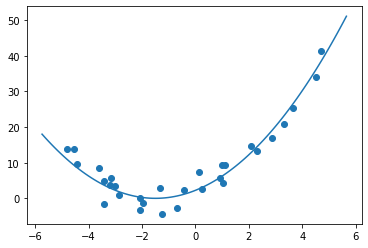

In [ ]:
dataset_1 = generate_data(N_train=30,
                          N_validation=30,
                          true_function=lambda x: (x + 1.5)**2, # <----- here's where we define the function
                                                                #        you may want to play around with it
                          limits=(-5, 5),
                          noize_func=lambda x: np.random.normal(size=len(x)) * 3.)
dataset_1.plot()

  0%|          | 0/2000 [00:00<?, ?it/s]

 38%|███▊      | 753/2000 [00:00<00:00, 7522.17it/s]

 75%|███████▌  | 1506/2000 [00:00<00:00, 7518.49it/s]

100%|██████████| 2000/2000 [00:00<00:00, 7973.49it/s]

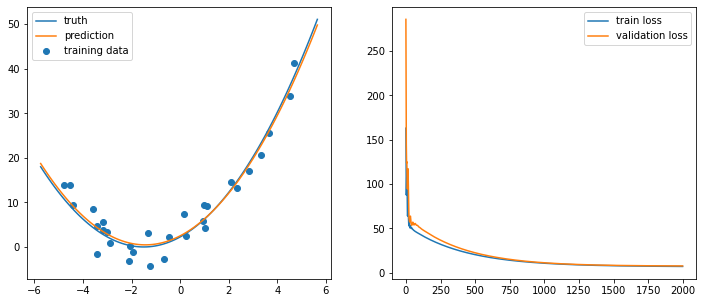

In [ ]:
model = LinearModel(
    n_features=3,
    preprocessing_steps=[
        lambda x: polynomial_expand(x, power=2, limits=(-6, 6))
    ]
)

train_model(model,
            dataset_1,
            num_steps=2000,
            learning_rate=0.5);

Try changing the learning rate, number of steps, the underlying true function or the noize power to see how it affects the solution.

## Problem #2: Linear function + outliers

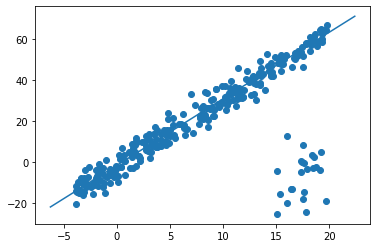

In [ ]:
dataset_2 = generate_data(N_train=300,
                          N_validation=300,
                          true_function=lambda x: 3.25 * x - 1.47,
                          limits=(-4., 20.),
                          noize_func=lambda x: (
                              np.random.normal(size=len(x)) * 4. +
                              np.where(
                                  x < 15,
                                  0.,
                                  -60 + np.random.normal(size=len(x)) * 10
                              ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
                          ))

dataset_2.plot()

  0%|          | 0/1000 [00:00<?, ?it/s]

 68%|██████▊   | 676/1000 [00:00<00:00, 6751.59it/s]

100%|██████████| 1000/1000 [00:00<00:00, 6720.40it/s]

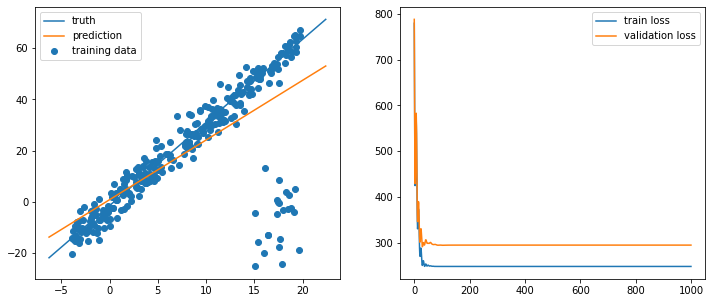

In [ ]:
model = LinearModel(
    n_features=2,
    preprocessing_steps=[
        lambda x: polynomial_expand(x, power=1, limits=(-5, 20))
    ]
)

train_model(model,
            dataset_2,
            num_steps=1000,
            learning_rate=0.5);

Looks like outliers affect the solution a lot. What if we change our loss from MSE to MAE?

  0%|          | 0/2000 [00:00<?, ?it/s]

 32%|███▏      | 635/2000 [00:00<00:00, 6349.08it/s]

 64%|██████▎   | 1270/2000 [00:00<00:00, 6202.32it/s]

 97%|█████████▋| 1941/2000 [00:00<00:00, 6428.53it/s]

100%|██████████| 2000/2000 [00:00<00:00, 6365.75it/s]

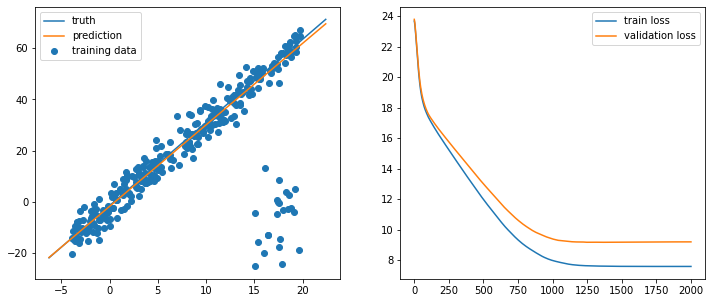

In [ ]:
model = LinearModel(
    n_features=2,
    preprocessing_steps=[
        lambda x: polynomial_expand(x, power=1, limits=(-5, 20))
    ],
    loss=MAELoss()
)

train_model(model,
            dataset_2,
            num_steps=2000,
            learning_rate=0.5);

## Problem #3: reconstructing faces

In this part we'll try to use our linear model to reconstruct right halves of human faces from the left halves.

In [4]:
!pip install scikit-learn

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB 991.0 kB/s eta 0:00:10
     ---------------------------------------- 0.1/9.2 MB 435.7 kB/s eta 0:00:22
     ---------------------------------------- 0.1/9.2 MB 737.3 kB/s eta 0:00:13
     ---------------------------------------- 0.1/9.2 MB 737.3 kB/s eta 0:00:13
     ---------------------------------------- 0.1/9.2 MB 737.3 kB/s eta 0:00:13
     ---------------------------------------- 0.1/9.2 MB 737.3 kB/s eta 0:00:13
     ---------------------------------------- 0.1/9.2 MB 737.3 kB/s eta 0:00:13
     ---------------------------------------- 0.1/9.2 MB 737.3 kB/s eta 0:00:13
     ---------------------------------------- 0.1/9.2 MB 737.3 kB/s eta 0:00:13
     ---------------------------------------- 0.1/9.2 MB 737.3 kB/s eta 0:00:13
     ---------------------------------------- 0.1/9.2 MB 737.3 kB/s eta 0:00:13
      --------------------------------------- 0.2


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\mmdre\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
from sklearn.datasets import fetch_olivetti_faces

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
faces, _ = fetch_olivetti_faces(data_home='/home/user/share/data/scikit_learn_data',dow return_X_y=True)
faces = faces.reshape(-1, 64, 64)

In [ ]:
# tear images in halves
def split(images):
    return images[:,:,:32], images[:,:,32:]

# glue them back together
def glue(X, Y):
    return np.concatenate([X, Y], axis=2)

# unwrap height and width into a single axis
def vectorize(X):
    return X.reshape(-1, 64 * 32)

# wrap single axis back into height and width
def imagize(X):
    return X.reshape(-1, 64, 32)

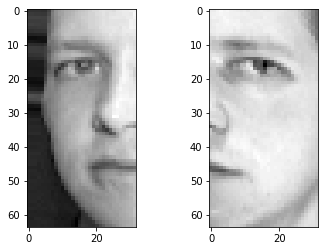

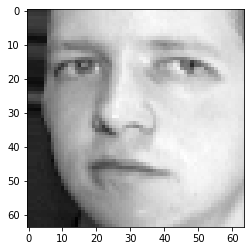

In [ ]:
X, Y = split(faces)
plt.subplot(121)
plt.imshow(X[3], cmap='gray')
plt.subplot(122)
plt.imshow(Y[3], cmap='gray')

plt.figure()
plt.imshow(glue(X, Y)[3], cmap='gray');

In [ ]:
dataset_3 = Dataset(vectorize(X)[:350],
                    vectorize(Y)[:350],
                    vectorize(X)[350:],
                    vectorize(Y)[350:],
                    true_function=None)

In [ ]:
model = LinearModel(
    32 * 64,
    32 * 64,
)

loss_train, loss_validation = train_model(model,
                                          dataset_3,
                                          num_steps=100,
                                          learning_rate=.027,
                                          do_plot=False);

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<01:32,  1.07it/s]

  2%|▏         | 2/100 [00:01<01:35,  1.03it/s]

  3%|▎         | 3/100 [00:03<01:48,  1.12s/it]

  4%|▍         | 4/100 [00:04<01:46,  1.11s/it]

  5%|▌         | 5/100 [00:05<01:41,  1.07s/it]

  6%|▌         | 6/100 [00:06<01:44,  1.12s/it]

  7%|▋         | 7/100 [00:07<01:52,  1.21s/it]

  8%|▊         | 8/100 [00:09<01:48,  1.17s/it]

  9%|▉         | 9/100 [00:10<01:47,  1.18s/it]

 10%|█         | 10/100 [00:10<01:33,  1.03s/it]

 11%|█         | 11/100 [00:11<01:30,  1.02s/it]

 12%|█▏        | 12/100 [00:12<01:26,  1.01it/s]

 13%|█▎        | 13/100 [00:13<01:28,  1.02s/it]

 14%|█▍        | 14/100 [00:14<01:27,  1.01s/it]

 15%|█▌        | 15/100 [00:16<01:28,  1.04s/it]

 16%|█▌        | 16/100 [00:17<01:31,  1.09s/it]

 17%|█▋        | 17/100 [00:18<01:28,  1.06s/it]

 18%|█▊        | 18/100 [00:19<01:27,  1.07s/it]

 19%|█▉        | 19/100 [00:20<01:22,  1.02s/it]

 20%|██        | 20/100 [00:21<01:18,  1.02it/s]

 21%|██        | 21/100 [00:22<01:18,  1.01it/s]

 22%|██▏       | 22/100 [00:23<01:15,  1.04it/s]

 23%|██▎       | 23/100 [00:24<01:19,  1.03s/it]

 24%|██▍       | 24/100 [00:25<01:24,  1.11s/it]

 25%|██▌       | 25/100 [00:26<01:18,  1.05s/it]

 26%|██▌       | 26/100 [00:27<01:12,  1.03it/s]

 27%|██▋       | 27/100 [00:28<01:13,  1.01s/it]

 28%|██▊       | 28/100 [00:29<01:10,  1.02it/s]

 29%|██▉       | 29/100 [00:30<01:09,  1.02it/s]

 30%|███       | 30/100 [00:30<01:03,  1.11it/s]

 31%|███       | 31/100 [00:32<01:06,  1.04it/s]

 32%|███▏      | 32/100 [00:33<01:10,  1.03s/it]

 33%|███▎      | 33/100 [00:34<01:10,  1.05s/it]

 34%|███▍      | 34/100 [00:35<01:08,  1.04s/it]

 35%|███▌      | 35/100 [00:36<01:04,  1.00it/s]

 36%|███▌      | 36/100 [00:37<01:05,  1.03s/it]

 37%|███▋      | 37/100 [00:38<01:11,  1.14s/it]

 38%|███▊      | 38/100 [00:39<01:08,  1.10s/it]

 39%|███▉      | 39/100 [00:40<01:05,  1.07s/it]

 40%|████      | 40/100 [00:41<01:02,  1.05s/it]

 41%|████      | 41/100 [00:42<01:02,  1.06s/it]

 42%|████▏     | 42/100 [00:44<01:04,  1.10s/it]

 43%|████▎     | 43/100 [00:45<01:01,  1.07s/it]

 44%|████▍     | 44/100 [00:46<01:02,  1.11s/it]

 45%|████▌     | 45/100 [00:47<00:57,  1.05s/it]

 46%|████▌     | 46/100 [00:48<00:55,  1.03s/it]

 47%|████▋     | 47/100 [00:49<00:54,  1.02s/it]

 48%|████▊     | 48/100 [00:50<00:52,  1.02s/it]

 49%|████▉     | 49/100 [00:51<00:51,  1.01s/it]

 50%|█████     | 50/100 [00:52<00:50,  1.01s/it]

 51%|█████     | 51/100 [00:53<00:50,  1.04s/it]

 52%|█████▏    | 52/100 [00:54<00:46,  1.04it/s]

 53%|█████▎    | 53/100 [00:55<00:45,  1.03it/s]

 54%|█████▍    | 54/100 [00:56<00:45,  1.02it/s]

 55%|█████▌    | 55/100 [00:57<00:44,  1.01it/s]

 56%|█████▌    | 56/100 [00:58<00:46,  1.05s/it]

 57%|█████▋    | 57/100 [00:59<00:47,  1.10s/it]

 58%|█████▊    | 58/100 [01:00<00:43,  1.04s/it]

 59%|█████▉    | 59/100 [01:01<00:40,  1.00it/s]

 60%|██████    | 60/100 [01:02<00:38,  1.03it/s]

 61%|██████    | 61/100 [01:03<00:39,  1.01s/it]

 62%|██████▏   | 62/100 [01:04<00:38,  1.00s/it]

 63%|██████▎   | 63/100 [01:05<00:37,  1.00s/it]

 64%|██████▍   | 64/100 [01:06<00:36,  1.00s/it]

 65%|██████▌   | 65/100 [01:07<00:34,  1.03it/s]

 66%|██████▌   | 66/100 [01:08<00:33,  1.02it/s]

 67%|██████▋   | 67/100 [01:09<00:32,  1.01it/s]

 68%|██████▊   | 68/100 [01:10<00:32,  1.02s/it]

 69%|██████▉   | 69/100 [01:11<00:31,  1.01s/it]

 70%|███████   | 70/100 [01:12<00:29,  1.02it/s]

 71%|███████   | 71/100 [01:13<00:27,  1.05it/s]

 72%|███████▏  | 72/100 [01:14<00:27,  1.03it/s]

 73%|███████▎  | 73/100 [01:15<00:26,  1.02it/s]

 74%|███████▍  | 74/100 [01:16<00:26,  1.01s/it]

 75%|███████▌  | 75/100 [01:17<00:25,  1.01s/it]

 76%|███████▌  | 76/100 [01:18<00:24,  1.04s/it]

 77%|███████▋  | 77/100 [01:19<00:22,  1.00it/s]

 78%|███████▊  | 78/100 [01:20<00:21,  1.00it/s]

 79%|███████▉  | 79/100 [01:21<00:20,  1.03it/s]

 80%|████████  | 80/100 [01:22<00:20,  1.04s/it]

 81%|████████  | 81/100 [01:23<00:19,  1.03s/it]

 82%|████████▏ | 82/100 [01:24<00:17,  1.01it/s]

 83%|████████▎ | 83/100 [01:25<00:17,  1.02s/it]

 84%|████████▍ | 84/100 [01:26<00:17,  1.08s/it]

 85%|████████▌ | 85/100 [01:27<00:15,  1.05s/it]

 86%|████████▌ | 86/100 [01:28<00:15,  1.10s/it]

 87%|████████▋ | 87/100 [01:29<00:14,  1.10s/it]

 88%|████████▊ | 88/100 [01:30<00:13,  1.13s/it]

 89%|████████▉ | 89/100 [01:32<00:12,  1.15s/it]

 90%|█████████ | 90/100 [01:33<00:11,  1.11s/it]

 91%|█████████ | 91/100 [01:34<00:09,  1.07s/it]

 92%|█████████▏| 92/100 [01:35<00:08,  1.02s/it]

 93%|█████████▎| 93/100 [01:36<00:07,  1.01s/it]

 94%|█████████▍| 94/100 [01:36<00:05,  1.02it/s]

 95%|█████████▌| 95/100 [01:38<00:05,  1.05s/it]

 96%|█████████▌| 96/100 [01:39<00:04,  1.06s/it]

 97%|█████████▋| 97/100 [01:40<00:03,  1.07s/it]

 98%|█████████▊| 98/100 [01:41<00:02,  1.05s/it]

 99%|█████████▉| 99/100 [01:42<00:01,  1.19s/it]

100%|██████████| 100/100 [01:44<00:00,  1.37s/it]

100%|██████████| 100/100 [01:44<00:00,  1.05s/it]

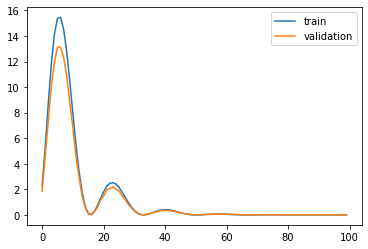

In [ ]:
plt.plot(loss_train, label='train')
plt.plot(loss_validation, label='validation');
plt.legend();

A brief utility function to glue the prediction back with the left half of the image for a number of pictures in the dataset, and plot the result.

In [ ]:
def show_model_predictions(model):
    pred_train = model.predict(dataset_3.X_train)
    pred_train = glue(
        imagize(dataset_3.X_train),
        imagize(pred_train)
    )

    pred_validation = model.predict(dataset_3.X_validation)
    pred_validation = glue(
        imagize(dataset_3.X_validation),
        imagize(pred_validation)
    )
    plt.figure(figsize=(8, 8))
    plt.imshow(
        pred_train[:25].reshape(5, 5, 64, 64).transpose(0, 2, 1, 3).reshape(5 * 64, 5 * 64),
        cmap='gray'
    )
    plt.title("Training images")

    plt.figure(figsize=(8, 8))
    plt.imshow(
        pred_validation[:25].reshape(5, 5, 64, 64).transpose(0, 2, 1, 3).reshape(5 * 64, 5 * 64),
        cmap='gray'
    )
    plt.title("Validation images")

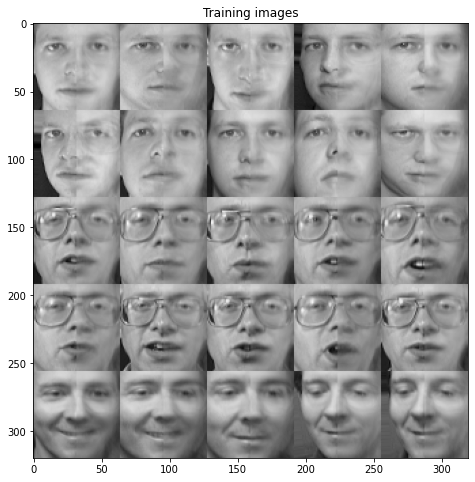

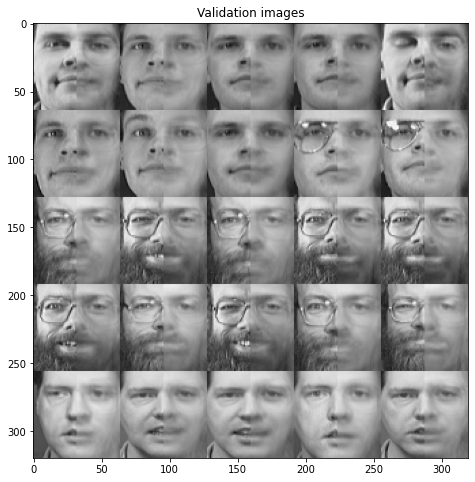

In [ ]:
show_model_predictions(model)

In fact, $X^TX$ matrix is quite ill-defined for such an example, so gradient descent optimization needs a lot of steps to converge. What we did is in fact an early stopping, so we didn't quite get into the overfitting region yet.

If however we use the analytical solution for the linear regression, see what we get:

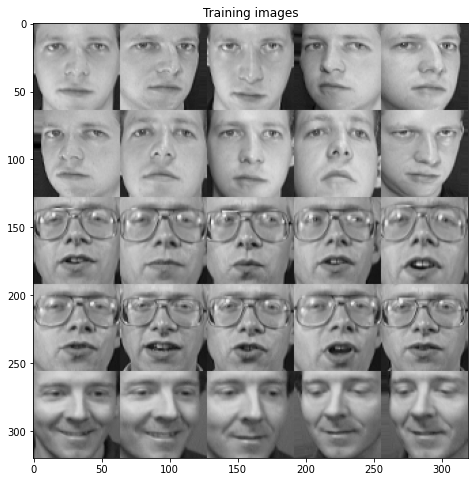

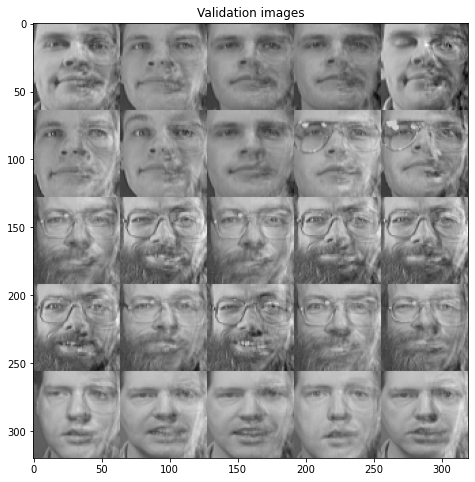

In [ ]:
import scipy
model.W = scipy.linalg.lstsq(dataset_3.X_train, dataset_3.y_train)[0]

show_model_predictions(model)

Quite creepy, isn't it?

## The sklearn way

In this tutorial, we wrote all the learning algorithms from scratch, only relying on the vectorized numpy operations. This was very useful as an educational example.

All these models are however already implemented in sklearn. So here's an example of building a sklearn pipeline with scaling and expanding the features, and then predicting with the linear regression model.

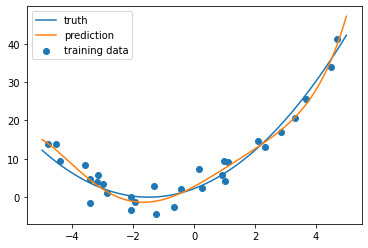

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

model = make_pipeline(
    MinMaxScaler((-1, 1)),
    PolynomialFeatures(degree=5, include_bias=False),
    LinearRegression(fit_intercept=True)
)

model.fit(dataset_1.X_train, dataset_1.y_train)

xx = np.linspace(-5, 5, 100)
plt.scatter(dataset_1.X_train, dataset_1.y_train, label='training data')
plt.plot(xx, dataset_1.true_function(xx), label='truth')
plt.plot(xx, model.predict(xx.reshape(-1, 1)), label='prediction')
plt.legend();

Try changing things, e.g.:
 - degree of the polynomial features
 - different scalers (e.g. `sklearn.preprocessing.StandardScaler` or `sklearn.preprocessing.RobustScaler`)
 - check out `sklearn.linear_model.SGDRegressor`